In [1]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from re import findall
from hazm import Stemmer, word_tokenize
from sklearn.feature_selection import chi2, SelectKBest
from glob import glob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

"""Countvectorzer initialize"""
vect = CountVectorizer()
is_file = True

"""stemmer from hazm"""
stemmer = Stemmer()
stopwords = set(open('stop-words.txt', encoding='utf8').read().splitlines())
hamtrains = glob('dataset/hamtraining/hamtraining*.txt')
spamtrains = glob('dataset/spamtraining/spamtraining*.txt')

hamtests = glob('dataset/hamtesting/hamtesting*.txt')
spamtests = glob('dataset/spamtesting/spamtesting*.txt')

ham_spam_test = hamtests + spamtests
ham_spam_train = hamtrains + spamtrains

y_train = [False for i in range(300)]
y_spam_train = [True for i in range(300)]
y_train.extend(y_spam_train)


y_test = [False for i in range(200)]
y_spam_test = [True for i in range(200)]
y_test.extend(y_spam_test)

### Preprocess

In [2]:
class const:
    farsi = ('ب', 'س', 'ش', 'ل', 'ت', 'ن', 'م', 'گ', 'ظ', 'ط', 'ز',
             'ر', 'ژ', 'ذ', 'د', 'پ', 'چ', 'ج', 'ح', 'ع', 
             'خ', 'غ', 'ف', 'ق', 'ث', 'ص', 'ض','\u0020', '\u060c','؟', '!', '?', '.', ':','\n','_')

    alef = ('ا', 'آ', 'ء', 'أ', 'إ')
    vav = ('و', 'ؤ')
    heh = ('ه', 'ة', 'ە')
    yah = ('ی', 'ي', 'ئ', 'ى')
    kaf = ('ک', 'ك')
    punc = ('_', '-')

def persian_char(char):
    if char in const.farsi:
        return char
    if char in const.alef:
        return const.alef[0]
    if char in const.vav:
        return const.vav[0]
    if char in const.heh:
        return const.heh[0]
    if char in const.yah:
        return const.yah[0]
    if char in const.kaf:
        return const.kaf[0]
    if char in const.punc:
      return ' '
    return ''

def pre_process(path):
    if is_file == False:
        text = path
    else:
        text = open(path, encoding='utf8').read()

#     urls = len(findall('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+', text))
    
    map_test = map(persian_char, text)
    sentence = ''.join(map_test)
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if w not in stopwords] #+ ['url' for i in range(urls)]
    filtered_sentence = ' '.join(filtered_sentence)
    return filtered_sentence

In [3]:
def feature(data):
    if is_file == False:
        feature_list = [pre_process(data)]
    else:    
        map_loop = map(pre_process, data)
        feature_list = list(map_loop)
    return feature_list

In [4]:
def vectorize(feature_list):
    X_dtm = vect.fit_transform(feature_list)
    X_dtm = X_dtm.toarray()
    return X_dtm

In [5]:
def feature_selection(k,X_dtm):
    chi2_features = SelectKBest(chi2, k=k)
    X_kbest_features = chi2_features.fit_transform(X_dtm, y_train)
    return X_kbest_features, chi2_features

In [6]:
def transform(data,chi2_features):
    tokens = feature(data)
    x0 = vect.transform(tokens).toarray()
    cx = chi2_features.transform(x0)
    return cx

In [7]:
X_dtm = vectorize(feature(ham_spam_train))
x_train, chi2_features = feature_selection(700,X_dtm)

### Just for Intuition

In [8]:
# gnb = GaussianNB()
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [9]:
"""Just for test and compare"""
x_test = transform(ham_spam_test, chi2_features)
predict_val = mnb.predict(x_test)

In [10]:
"""Show metrics and score!"""
print(classification_report(y_test, predict_val))

              precision    recall  f1-score   support

       False       0.93      0.97      0.95       200
        True       0.97      0.93      0.95       200

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



### Naive bayes model

In [11]:
test_data = transform(ham_spam_test, chi2_features)

In [12]:
test_data[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
ps = 0.5
ph = 0.5

hamMatrix = np.zeros(700)
hamTotalCount = 0
for i in range (300):
    z = 0
    for j in x_train[i]:
        hamTotalCount += j
        hamMatrix[z] += j
        z += 1
        
spamMatrix = np.zeros(700)
spamTotalCount = 0
for i in range(300, 600):
    z = 0
    for j in x_train[i]:
        spamTotalCount += j
        spamMatrix[z] += j
        z += 1

for i in range(700):
    hamMatrix[i] = (hamMatrix[i] + 1) / (hamTotalCount + 700)
    spamMatrix[i] = (spamMatrix[i] + 1) / (spamTotalCount + 700)

In [27]:
def NBModel(mail):
    flag = 0
    spamProbability = ps
    hamProbability = ph
    for i in range(700):
        spamProbability = spamProbability * pow(spamMatrix[i], mail[i])
        hamProbability = hamProbability * pow(hamMatrix[i], mail[i])
    if (spamProbability > hamProbability):
        flag = True
    else :
        flag = False
    return flag

In [28]:
y_hat = []
for i in x_test:
    y_hat.append(NBModel(i))

### Result

In [29]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

       False       0.76      0.97      0.86       200
        True       0.97      0.69      0.81       200

    accuracy                           0.83       400
   macro avg       0.86      0.83      0.83       400
weighted avg       0.86      0.83      0.83       400



In [102]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_hat)
print(confusion)

[[195   5]
 [ 61 139]]


<AxesSubplot:>

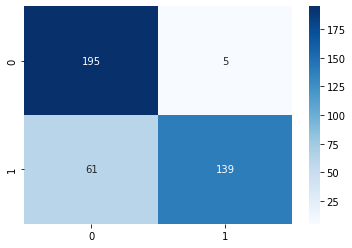

In [111]:
import seaborn as sns
sns.heatmap(confusion, annot=True,fmt='d', cmap='Blues')

<AxesSubplot:>

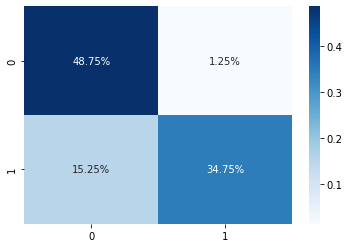

In [104]:
sns.heatmap(confusion/np.sum(confusion),
            annot=True, fmt='.2%', cmap='Blues')